### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

In [23]:
df = pd.read_excel('./data.xlsx', header=2)
df.head()

,CNP,Gender,Age,DataSemnarii,DataInchis,Number,Produs,CreditLimit,State,scoringdate,...,PenguinIgnoringBNR,DolphinIgnoringBNR,ClientCategory,Comission,Withdrawed,DpdDiffDaysMax,DpdTotal,PaidTotal,FutureTotal,IsDerrogationBNR
0,1900226063350,M,32,2021-10-15 18:37:54,2021-10-16 18:11:03,DK53851057,Penguin,1900,Inchis,2021-10-15 00:31:13,...,0,0,0,0,-1900.0,-27,0.0,1907.56,0.0,NaN
1,1900226063350,M,32,2021-11-06 03:38:12,2021-12-10 12:29:02,TC42768422,Penguin,700,Inchis,2021-10-15 00:31:13,...,0,0,0,0,-700.0,-22,0.0,783.58,0.0,NaN
2,1811228048420,M,41,2021-10-15 10:43:41,2022-01-14 16:20:02,HP51173676,Penguin,2000,Inchis,2021-10-15 07:34:50,...,0,0,0,0,-2000.0,3,0.0,2239.08,0.0,NaN
3,2821224845270,F,40,2021-10-17 10:21:42,2021-12-08 11:55:03,CL14119436,Penguin,700,Inchis,2021-10-15 08:26:57,...,0,0,0,0,-700.0,-5,0.0,783.58,0.0,NaN
4,1890122104070,M,33,2021-10-15 08:49:02,2021-12-04 10:04:03,XJ11096426,Crab,900,Inchis,2021-10-15 08:43:58,...,0,0,0,0,-900.0,-8,0.0,1185.00,0.0,NaN


There are some columns that we won't need, others that we will combine to create new ones (future engineering), others that we will leave them. In the end, many of them need preprocessing.

### Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CNP                 12516 non-null  int64         
 1   Gender              12516 non-null  object        
 2   Age                 12516 non-null  int64         
 3   DataSemnarii        12516 non-null  datetime64[ns]
 4   DataInchis          6827 non-null   datetime64[ns]
 5   Number              12516 non-null  object        
 6   Produs              12516 non-null  object        
 7   CreditLimit         12516 non-null  int64         
 8   State               12516 non-null  object        
 9   scoringdate         12516 non-null  datetime64[ns]
 10  score               12516 non-null  int64         
 11  ProbabilityOfModel  12516 non-null  float64       
 12  DeclIncome          12516 non-null  int64         
 13  ANAFIncome          12516 non-null  int64     

Observe that IsDerrogationBNR has null values. Based on the documentation, values of True are cases where derrogation was applied, and missing values are the cases when no derrogation was applied.

In [4]:
df.corr()

,CNP,Age,CreditLimit,score,ProbabilityOfModel,DeclIncome,ANAFIncome,TotalLoanPayments,BNR40Available,CreditsBefore,...,PenguinIgnoringBNR,DolphinIgnoringBNR,ClientCategory,Comission,Withdrawed,DpdDiffDaysMax,DpdTotal,PaidTotal,FutureTotal,IsDerrogationBNR
CNP,1.000000,-0.336624,-0.096260,-0.219706,-0.191227,0.000707,-0.137272,-0.120759,0.025745,-0.131463,...,-0.076833,-0.072290,0.054316,0.021687,0.073470,0.043171,-0.016114,-0.073999,-0.032678,NaN
Age,-0.336624,1.000000,0.130581,0.244421,0.102213,0.007718,0.112069,0.168958,-0.068621,0.093110,...,0.028323,0.053236,-0.123302,-0.068412,-0.105362,-0.050281,0.033344,0.084198,0.125503,NaN
CreditLimit,-0.096260,0.130581,1.000000,0.209701,0.198739,0.000910,0.258232,0.029827,0.155472,-0.073788,...,0.206824,0.296035,0.008315,0.131931,-0.608463,0.083989,-0.192456,0.459764,0.528404,NaN
score,-0.219706,0.244421,0.209701,1.000000,0.450053,0.006661,0.073034,0.128100,0.019141,0.201984,...,0.248323,0.309373,0.089054,0.171892,-0.121232,-0.161859,0.069222,0.110298,0.109294,NaN
ProbabilityOfModel,-0.191227,0.102213,0.198739,0.450053,1.000000,0.002512,0.199546,0.202830,-0.022211,0.233419,...,0.251897,0.174218,0.000319,0.075156,-0.158994,-0.176680,0.105025,0.158926,0.122754,NaN
DeclIncome,0.000707,0.007718,0.000910,0.006661,0.002512,1.000000,0.014354,0.007111,0.004501,-0.003069,...,-0.000937,0.006536,0.007349,0.007202,0.000065,-0.004641,0.004564,0.001845,0.003748,NaN
ANAFIncome,-0.137272,0.112069,0.258232,0.073034,0.199546,0.014354,1.000000,0.474117,0.262873,0.088634,...,0.180517,0.158913,-0.044248,-0.010075,-0.166637,-0.085005,0.057750,0.147277,0.140462,NaN
TotalLoanPayments,-0.120759,0.168958,0.029827,0.128100,0.202830,0.007111,0.474117,1.000000,-0.633516,0.161900,...,0.025283,-0.073985,-0.060168,-0.024425,-0.060309,-0.079639,0.081628,0.072686,0.048280,NaN
BNR40Available,0.025745,-0.068621,0.155472,0.019141,-0.022211,0.004501,0.262873,-0.633516,1.000000,-0.104828,...,0.143310,0.217521,0.081818,0.083935,-0.055472,0.022306,-0.051725,0.026875,0.049402,NaN
CreditsBefore,-0.131463,0.093110,-0.073788,0.201984,0.233419,-0.003069,0.088634,0.161900,-0.104828,1.000000,...,0.034892,0.051220,-0.101645,-0.080781,0.009024,-0.206900,0.159839,0.042446,-0.082707,NaN


Correlations between columns are small, or almost inexistent. There is a moderate correlation between ANAFIncome and TotalLoanPayments, but the later depends on the first one.

In [5]:
df[['CrabIgnoringBNR', 'PenguinIgnoringBNR', 'DolphinIgnoringBNR', 'ClientCategory']].corr()

,CrabIgnoringBNR,PenguinIgnoringBNR,DolphinIgnoringBNR,ClientCategory
CrabIgnoringBNR,1.000000,0.941015,0.780500,0.686266
PenguinIgnoringBNR,0.941015,1.000000,0.794875,0.584574
DolphinIgnoringBNR,0.780500,0.794875,1.000000,0.394129
ClientCategory,0.686266,0.584574,0.394129,1.000000


These have mostly big correlations.

In [6]:
df[df['ClientCategory'] == 1][['score', 'IsDerrogationBNR']].describe()

,score,IsDerrogationBNR
count,1106.000000,91.0
mean,665.332731,1.0
std,47.593048,0.0
min,0.000000,1.0
25%,640.000000,1.0
50%,661.000000,1.0
75%,687.000000,1.0
max,778.000000,1.0


A good client has a high score (mean of 665). The higher the score the less risky the client is.

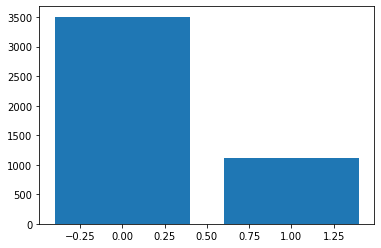

In [7]:
plt.bar([0, 1], [df[df['ClientCategory'] == 0].shape[0], df[df['ClientCategory'] == 1].shape[0]])
plt.show()

There is class imbalance, so when training the model class weights will be used.

In [8]:
df['Age'].describe()

count    12516.000000
mean        33.617370
std          8.924886
min         18.000000
25%         27.000000
50%         32.000000
75%         39.000000
max         74.000000
Name: Age, dtype: float64

In [9]:
df['State'].unique()

array(['Inchis', 'Executare', 'Activ', 'Moneysend'], dtype=object)

In [24]:
df[df['State'] == 'Moneysend']

,CNP,Gender,Age,DataSemnarii,DataInchis,Number,Produs,CreditLimit,State,scoringdate,...,PenguinIgnoringBNR,DolphinIgnoringBNR,ClientCategory,Comission,Withdrawed,DpdDiffDaysMax,DpdTotal,PaidTotal,FutureTotal,IsDerrogationBNR
12023,1990813949340,M,23,2022-08-18 14:36:13,NaT,QA96095388,Penguin,800,Moneysend,2022-08-17 21:42:15,...,0,0,0,0,-800.0,0,0.0,0.0,0.0,NaN


There is a single Moneysend sample. Though it is a possible value, so it will be considered too.

In [10]:
df['IncomeToCreditLimit'] = df['DeclIncome'] / df['CreditLimit']
df.loc[df['IncomeToCreditLimit'].idxmax()] # decl income too big compared to the anaf confirmed one

CNP                          2840820787384
Gender                                   F
Age                                     38
DataSemnarii           2022-02-28 11:43:31
DataInchis                             NaT
Number                          YN43622529
Produs                             Dolphin
CreditLimit                           1600
State                                Activ
scoringdate            2022-02-24 19:03:24
score                                  607
ProbabilityOfModel                  0.6606
DeclIncome                        13907890
ANAFIncome                            1436
TotalLoanPayments                       90
BNR40Available                         484
CreditsBefore                            0
OfferCrab                              300
OfferPenguin                           900
OfferDolphin                          1600
CrabIgnoringBNR                        500
PenguinIgnoringBNR                    1200
DolphinIgnoringBNR                    4000
ClientCateg

Interesting case, where declared income is a lot bigger than the ANAF confirmed one. A new column will be created that will represent by how much the declared income differs from the confirmed one.

In [11]:
len(df[df['DpdTotal'] == 0]), len(df[df['PaidTotal'] == 0]), len(df[df['PaidTotal'] == df['DpdTotal']])

(10928, 1236, 920)

Above you can see the amount of samples where clients are not over facture date, where people didn't pay for the credits and where these two cases intersect.

In [12]:
df.groupby('CNP')[['CreditLimit', 'TotalLoanPayments',]].agg(['min', 'max', 'mean'])

CreditLimit               TotalLoanPayments              
                      min   max    mean               min   max    mean
CNP                                                                    
1481020021080        3000  3000  3000.0               593   593   593.0
1500823095011        4000  4000  4000.0               290   290   290.0
1500927378284        6000  6000  6000.0               201   201   201.0
1501107458381        3000  3000  3000.0               635   635   635.0
1510505021040        3600  3600  3600.0              1549  1549  1549.0
...                   ...   ...     ...               ...   ...     ...
6021229161020         500   500   500.0                 0     0     0.0
6030119523330         600   600   600.0                 0     0     0.0
6030225200046         600   600   600.0                 0     0     0.0
6030418018460         700   700   700.0               463   463   463.0
7620119016210        2000  8800  5400.0              1280  1293  1286.5

[7370 rows x 6 columns]

Above you can see the aggregations that summarize the payments of individual persons.

In [13]:
df__ = df[df['IsDerrogationBNR'] == True]
df__[df__['State'] != 'Inchis']

,CNP,Gender,Age,DataSemnarii,DataInchis,Number,Produs,CreditLimit,State,scoringdate,...,DolphinIgnoringBNR,ClientCategory,Comission,Withdrawed,DpdDiffDaysMax,DpdTotal,PaidTotal,FutureTotal,IsDerrogationBNR,IncomeToCreditLimit
5374,2920106061420,F,30,2022-04-01 10:57:32,NaT,SJ46190900,Dolphin,3200,Activ,2022-03-02 11:49:33,...,3200,3,9,-7000.00,0,0.0,5280.90,3267.71,1.0,1.683750
5380,2981006631151,F,24,2022-03-31 12:59:34,NaT,IU82823960,Dolphin,4000,Activ,2022-03-02 15:35:57,...,4000,3,9,-20000.00,0,0.0,16324.00,4000.00,1.0,0.900000
5390,1900620205155,M,32,2022-04-01 12:00:37,NaT,MM52303125,Dolphin,4000,Activ,2022-03-03 09:41:54,...,4000,3,9,-8914.83,0,0.0,6027.83,4279.00,1.0,1.733750
5392,5000128120294,M,22,2022-03-29 16:47:33,NaT,FK97344292,Dolphin,3800,Activ,2022-03-03 10:41:33,...,3800,3,9,-6682.46,0,0.0,4286.46,3800.00,1.0,0.731579
5416,1900410436021,M,32,2022-04-01 18:58:24,NaT,PD27885581,Dolphin,1600,Activ,2022-03-04 07:03:33,...,1600,3,9,-3433.06,30,-2302.0,2709.66,0.00,1.0,0.956250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,1970415547374,M,25,2022-09-01 14:11:11,NaT,FK40472632,Penguin,2400,Activ,2022-09-01 10:33:51,...,0,3,9,-2400.00,0,0.0,0.00,2996.16,1.0,3.333333
12502,1700312023080,M,52,2022-09-02 11:40:16,NaT,CS30022608,Penguin,2400,Activ,2022-09-02 09:44:57,...,0,2,7,-2400.00,0,0.0,0.00,2842.80,1.0,2.047500
12505,1941008054160,M,28,2022-09-02 11:17:19,NaT,FX94021928,Penguin,2100,Activ,2022-09-02 11:10:06,...,0,3,9,-2100.00,0,0.0,0.00,2621.64,1.0,1.523810
12509,2870807097420,F,35,2022-09-02 13:08:16,NaT,DT83515030,Penguin,2400,Activ,2022-09-02 12:17:04,...,0,1,5,-2400.00,0,0.0,0.00,2692.08,1.0,2.291667


The table above shows samples that represent clients that received derrogation and have a closed payed credit, meaning derrogation was succesfully given to a safe client.

In [25]:
df[df['IsDerrogationBNR'] == True][['DataSemnarii', 'DataInchis']]

,DataSemnarii,DataInchis
5303,2022-03-29 15:36:15,2022-06-30 08:42:23
5365,2022-03-30 08:20:33,2022-07-11 14:23:04
5374,2022-04-01 10:57:32,NaT
5380,2022-03-31 12:59:34,NaT
5390,2022-04-01 12:00:37,NaT
...,...,...
12497,2022-09-01 19:22:03,2022-09-02 07:31:04
12502,2022-09-02 11:40:16,NaT
12505,2022-09-02 11:17:19,NaT
12509,2022-09-02 13:08:16,NaT


In [19]:
df[['Age', 'score', 'ANAFIncome', 'ClientCategory']].corr()

,Age,score,ANAFIncome,ClientCategory
Age,1.000000,0.244421,0.112069,-0.123302
score,0.244421,1.000000,0.073034,0.089054
ANAFIncome,0.112069,0.073034,1.000000,-0.044248
ClientCategory,-0.123302,0.089054,-0.044248,1.000000


There are almost no correlations between age, score, ANAF confirmed income and the client category

In [20]:
df[['score', 'ProbabilityOfModel', 'DeclIncome', 'ANAFIncome', 'TotalLoanPayments', 'BNR40Available', 'CreditsBefore', 'ClientCategory']].corr()

,score,ProbabilityOfModel,DeclIncome,ANAFIncome,TotalLoanPayments,BNR40Available,CreditsBefore,ClientCategory
score,1.000000,0.450053,0.006661,0.073034,0.128100,0.019141,0.201984,0.089054
ProbabilityOfModel,0.450053,1.000000,0.002512,0.199546,0.202830,-0.022211,0.233419,0.000319
DeclIncome,0.006661,0.002512,1.000000,0.014354,0.007111,0.004501,-0.003069,0.007349
ANAFIncome,0.073034,0.199546,0.014354,1.000000,0.474117,0.262873,0.088634,-0.044248
TotalLoanPayments,0.128100,0.202830,0.007111,0.474117,1.000000,-0.633516,0.161900,-0.060168
BNR40Available,0.019141,-0.022211,0.004501,0.262873,-0.633516,1.000000,-0.104828,0.081818
CreditsBefore,0.201984,0.233419,-0.003069,0.088634,0.161900,-0.104828,1.000000,-0.101645
ClientCategory,0.089054,0.000319,0.007349,-0.044248,-0.060168,0.081818,-0.101645,1.000000


Moderate correlation between: score-ProbabilityOfModel, ANAFIncome-TotalLoanPayments (logic)

In [21]:
df['Produs'] = df['Produs'].map({'Penguin': 3, 'Crab': 2, 'Dolphin': 1})
df[['Produs', 'ClientCategory']].corr()

,Produs,ClientCategory
Produs,1.000000,-0.181072
ClientCategory,-0.181072,1.000000


There shouldn't be any bias regarding the type of credit product the client chooses when evaluating his/her riskyness

In [22]:
df['Comission'].value_counts()

9    5684
0    2698
7    2395
5    1739
Name: Comission, dtype: int64

There are only comissions of 0, 5, 7 and 9